# Section 08 - Performance Analysis

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
planet = Planet('URANUS')
planet.loadAtmosphereModel('../../../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_skip = 1000.0E3
planet.h_low  = 120e3
planet.h_trap = 100e3

In [6]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.7 ,0.0,0.0)
vehicle.setSolverParams(1E-6)
# Set the guidance parameters described in the paper.
# See the function description for parameter details.

# Set max roll rate constraint to 30 deg/s
vehicle.setMaxRollRate(30.0)

# Set Ghdot = 83
# Set Gq = 9.0
# Set v_switch_kms = 16.0 :: this parameter is not really used, and should just be set to low value
# Set low_Alt_km = 120
# Set numPoints_lowAlt = 101
# Set hdot_threshold = -500 m/s
vehicle.setEquilibriumGlideParams(83.0, 9.0, 16.0, 120.0, 101, -500.0)

# Set target orbit parameters
# periapsis = 4000.0 km
# apoapsis = 550,000 km :: set slightly above target (500e3) to account for bias in targeting algorithm
# apoapsis tolerance = 10 km
vehicle.setTargetOrbitParams(4000.0, 550.0E3, 10.0E3)

In [7]:
# Set path to atmfiles with randomly perturbed atmosphere files.
atmfiles = ['../../../atmdata/Uranus/perturbed/G-01.txt',
            '../../../atmdata/Uranus/perturbed/G-02.txt',
            '../../../atmdata/Uranus/perturbed/G-03.txt',
            '../../../atmdata/Uranus/perturbed/G-04.txt',
            '../../../atmdata/Uranus/perturbed/G-05.txt']

In [8]:
vehicle.setupMonteCarloSimulation(1201, 200, atmfiles, 0, 1, 2, 3, 4, True, \
                                 -11.70, 0.10, 0.24, 0.013, 0.5, 0.1, 2400.0)

## Small run N = 100

In [9]:
vehicle.runMonteCarlo2(100, '../../../data/acta-astronautica/uranus-orbiter-probe/MCBX2')

RUN #: 1, SAMPLE #: 190, EFPA: -11.85, SIGMA: 0.45, LD: 0.25, APO : 510506.90
RUN #: 2, SAMPLE #: 73, EFPA: -11.46, SIGMA: 0.62, LD: 0.24, APO : 465139.82
RUN #: 3, SAMPLE #: 86, EFPA: -11.59, SIGMA: -1.18, LD: 0.23, APO : 544976.68
RUN #: 4, SAMPLE #: 3, EFPA: -11.74, SIGMA: -0.25, LD: 0.23, APO : 536170.62
RUN #: 5, SAMPLE #: 155, EFPA: -11.50, SIGMA: -0.03, LD: 0.25, APO : 492317.60
RUN #: 6, SAMPLE #: 110, EFPA: -11.59, SIGMA: 1.21, LD: 0.24, APO : 529249.56
RUN #: 7, SAMPLE #: 199, EFPA: -11.67, SIGMA: 0.37, LD: 0.26, APO : 522288.53
RUN #: 8, SAMPLE #: 177, EFPA: -11.77, SIGMA: 0.10, LD: 0.26, APO : 540324.29
RUN #: 9, SAMPLE #: 166, EFPA: -11.74, SIGMA: 0.91, LD: 0.24, APO : 492239.14
RUN #: 10, SAMPLE #: 83, EFPA: -11.51, SIGMA: -0.59, LD: 0.26, APO : 463737.68
RUN #: 11, SAMPLE #: 99, EFPA: -11.78, SIGMA: -1.13, LD: 0.24, APO : 470871.92
RUN #: 12, SAMPLE #: 108, EFPA: -11.73, SIGMA: 0.92, LD: 0.24, APO : 542551.49
RUN #: 13, SAMPLE #: 126, EFPA: -11.63, SIGMA: 0.91, LD: 0.26,

In [10]:
p1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBX2/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBX2/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBX2/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBX2/q_stag_max_arr.txt')
h1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBX2/heatload_max_arr.txt')
u1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBX2/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCBX2/apoapsis_raise_DV_arr.txt')

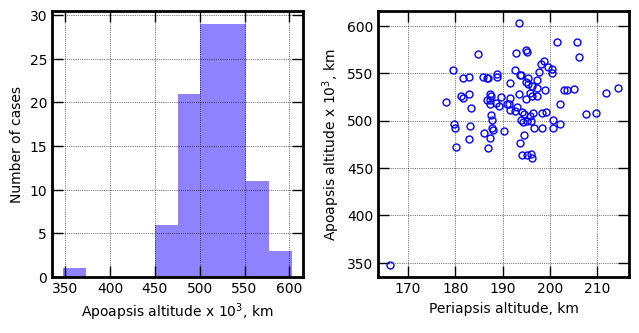

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=10)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=10)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

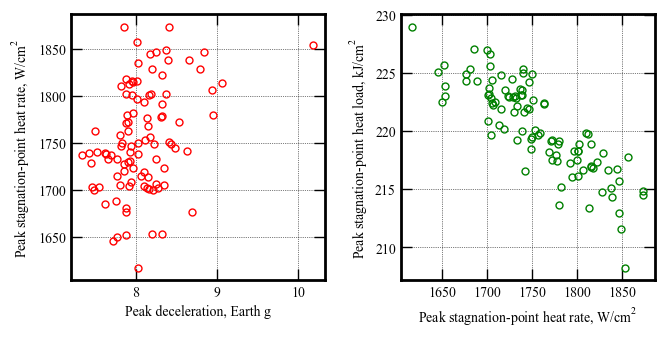

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].plot(y1, z1, 'ro', markersize=5, mfc='None')
axes[0].set_xlabel('Peak deceleration, Earth g', fontsize=10)
axes[0].set_ylabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=10)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)

axes[1].plot(z1, h1, 'go', markersize=5, mfc='None')
axes[1].set_xlabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=10)
axes[1].set_ylabel('Peak stagnation-point heat load, '+r'$kJ/cm^2$', fontsize=10)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

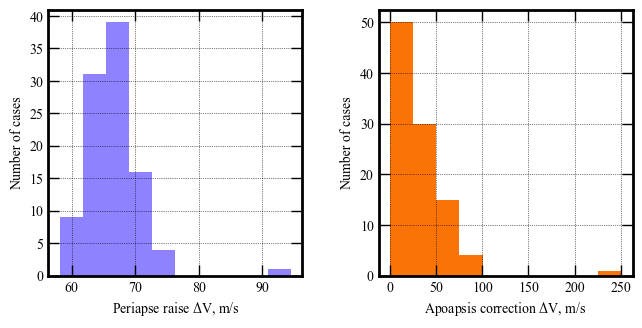

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(u1, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Periapse raise '+r'$\Delta V$'+', m/s', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=10)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)

axes[1].hist(np.abs(v1), bins=10, color='xkcd:orange')
axes[1].set_xlabel('Apoapsis correction '+r'$\Delta V$'+', m/s', fontsize=10)
axes[1].set_ylabel('Number of cases', fontsize=10)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

## Production run N = 2000

Run the file ```08-performance-analysis-prd.py``` to do 2000 Monte Carlo runs. The output logs from the run are in ```08-production-log.txt```. The aggregate data from the ```data/acta-astronautica/uranus-orbiter-probe/MCB/```.

In [13]:
p1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCB/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCB/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCB/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCB/q_stag_max_arr.txt')
h1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCB/heatload_max_arr.txt')
u1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCB/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../../../data/acta-astronautica/uranus-orbiter-probe/MCB/apoapsis_raise_DV_arr.txt')

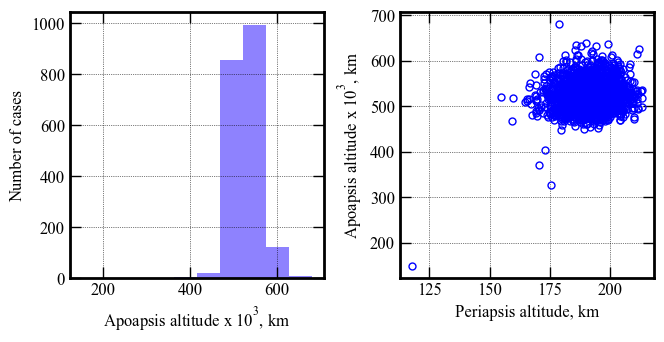

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.25))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

The one case with apoapsis below 200,000 km is an outlier. We will investigate which run this corresponded to.

## Remove outlier case

In [6]:
np.argmin(x1)

1308

Let us look at the log line for Run #1309

RUN #: 1309, SAMPLE #: 183, EFPA: -11.52, SIGMA: -2.51, LD: 0.25, APO : 149053.24

This is a shallow entry (+1.8$\sigma$), with low atmospheric mean density (-2.51$\sigma$). We make a note of this outlier, and remove it from the plots for better visualization.

In [18]:
p1 = np.delete(p1, 1308)
x1 = np.delete(x1, 1308)
y1 = np.delete(y1, 1308)
z1 = np.delete(z1, 1308)
h1 = np.delete(h1, 1308)
u1 = np.delete(u1, 1308)
v1 = np.delete(v1, 1308)

In [19]:
print("--------------------------------------------------------------------------------------------------------")

print("Parameter              |      Min.     0.13-percentile      Mean      99.87-percentile      Max")
print("--------------------------------------------------------------------------------------------------------")
print("Apoapsis altitude, km  |    " + str(round(np.min(x1))) + "          " +  str(round(np.percentile(x1, 0.13))) +\
                                                                "         " +  str(round(np.average(x1))) +
                                                                "          " +  str(round(np.percentile(x1, 99.87)))+\
                                                                "          " +  str(round(np.max(x1))))
print("Periapsis altitude, km |       " + str(round(np.min(p1))) + "             " +  str(round(np.percentile(p1, 0.13))) +\
                                                                "            " +  str(round(np.average(p1))) +
                                                                "             " +  str(round(np.percentile(p1, 99.87)))+\
                                                                "             " +  str(round(np.max(p1))))
print("Peak deceleration, g   |       " + str(round(np.min(y1), 2)) + "           " +  str(round(np.percentile(y1, 0.13), 2)) +\
                                                                "           " +  str(round(np.average(y1), 2)) +
                                                                "            " +  str(round(np.percentile(y1, 99.87), 2))+\
                                                                "           " +  str(round(np.max(y1), 2)))

print("Peak heat rate, W/cm2  |       " + str(round(np.min(z1))) + "           " +  str(round(np.percentile(z1, 0.13))) +\
                                                                "           " +  str(round(np.average(z1))) +
                                                                "            " +  str(round(np.percentile(z1, 99.87)))+\
                                                                "            " +  str(round(np.max(z1))))

print("Peak heat load, kJ/cm2 |        " + str(round(np.min(h1))) + "            " +  str(round(np.percentile(h1, 0.13))) +\
                                                                "            " +  str(round(np.average(h1))) +
                                                                "             " +  str(round(np.percentile(h1, 99.87)))+\
                                                                "             " +  str(round(np.max(h1))))
print("Periapsis raise dV, m/s|      " + str(round(np.min(u1), 2)) + "          " +  str(round(np.percentile(u1, 0.13), 2)) +\
                                                                "          " +  str(round(np.average(u1), 2)) +
                                                                "           " +  str(round(np.percentile(u1, 99.87), 2))+\
                                                                "           " +  str(round(np.max(u1), 2)))

print("Apoapsis corr. dV, m/s |     " + str(round(np.min(v1), 2)) + "         " +  str(round(np.percentile(v1, 0.13), 2)) +\
                                                                "           " +  str(round(np.average(v1), 2)) +
                                                                "          " +  str(round(np.percentile(v1, 99.87), 2))+\
                                                                "          " +  str(round(np.max(v1), 2)))

print("--------------------------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------------------------
Parameter              |      Min.     0.13-percentile      Mean      99.87-percentile      Max
--------------------------------------------------------------------------------------------------------
Apoapsis altitude, km  |    327575          430906         526466          636097          680611
Periapsis altitude, km |       155             163            192             213             213
Peak deceleration, g   |       6.84           7.06           8.01            9.93           10.75
Peak heat rate, W/cm2  |       1583           1597           1747            1914            1928
Peak heat load, kJ/cm2 |        204            206            221             233             235
Periapsis raise dV, m/s|      52.33          55.45          65.83           78.71           99.09
Apoapsis corr. dV, m/s |     -87.83         -61.66           21.5          123.21          290.38
--------

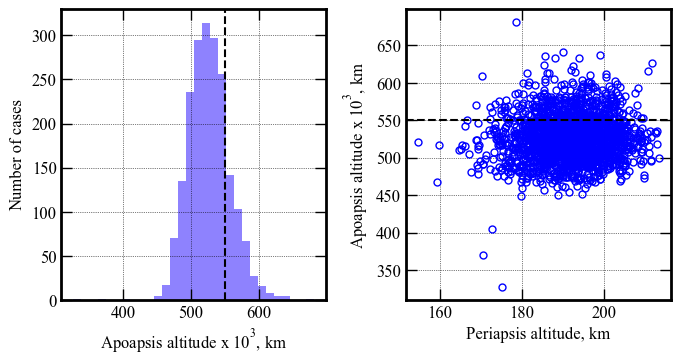

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].axvline(x=550.0, linewidth=1.5, color='k', linestyle='dashed')
axes[0].hist(x1/1000.0, bins=30, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')
axes[1].axhline(y=550.0, linewidth=1.5, color='k', linestyle='dashed')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=12)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=12)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/periapsis-vs-apoapsis.eps', dpi=300,bbox_inches='tight')


plt.show()

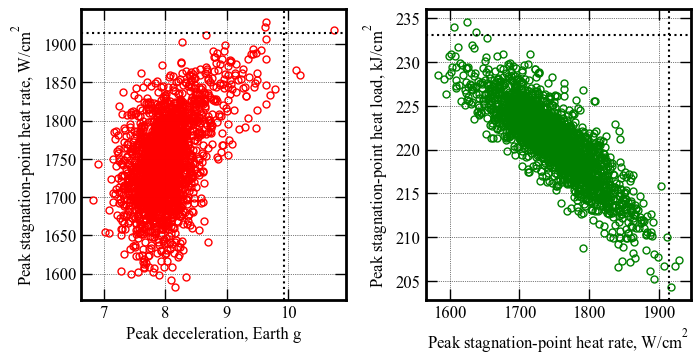

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].plot(y1, z1, 'ro', markersize=5, mfc='None')
axes[0].axhline(y=np.percentile(z1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].axvline(x=np.percentile(y1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].set_xlabel('Peak deceleration, Earth g', fontsize=12)
axes[0].set_ylabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=12)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)

axes[1].plot(z1, h1, 'go', markersize=5, mfc='None')
axes[1].axhline(y=np.percentile(h1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].axvline(x=np.percentile(z1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].set_xlabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=12)
axes[1].set_ylabel('Peak stagnation-point heat load, '+r'$kJ/cm^2$', fontsize=12)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/heat-rate-vs-g-load.eps', dpi=300,bbox_inches='tight')


plt.show()

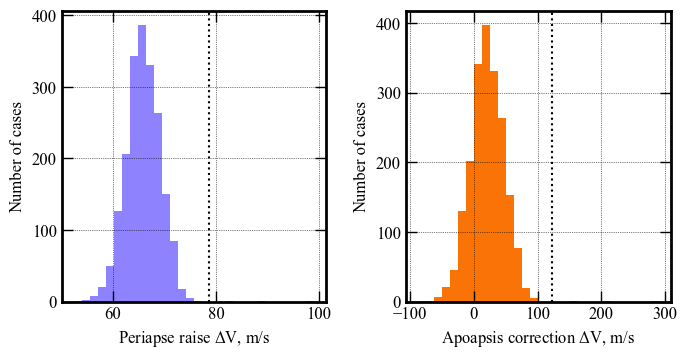

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (6.75, 3.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

fig.tight_layout()
plt.subplots_adjust(wspace=0.30)


axes[0].hist(u1, bins=30, color='xkcd:periwinkle')
axes[0].axvline(x=np.percentile(u1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[0].set_xlabel('Periapse raise '+r'$\Delta V$'+', m/s', fontsize=12)
axes[0].set_ylabel('Number of cases', fontsize=12)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=12)

axes[1].hist(v1, bins=30, color='xkcd:orange')
axes[1].axvline(x=np.percentile(v1, 99.87), linewidth=1.5, color='k', linestyle='dotted')
axes[1].set_xlabel('Apoapsis correction '+r'$\Delta V$'+', m/s', fontsize=12)
axes[1].set_ylabel('Number of cases', fontsize=12)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=12)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/acta-astronautica/uranus-orbiter-probe/prm-arm-maneuvers.eps', dpi=300,bbox_inches='tight')


plt.show()

In [9]:
def percent_between(a, lower, upper, closed_left=True, closed_right=True):
    """
    Finds the percentage of values between a range for a numpy array

    Parameters
    ----------
    a: np.ndarray
      numpy array to calculate percentage
    lower: int, float
      lower bound
    upper: int, float
      upper bound
    closed_left:
      closed left bound ( > vs >= )
    closed_right:
      closed right bound ( < vs <= )
    """
    l = np.greater if not closed_left else np.greater_equal
    r = np.less if not closed_right else np.less_equal

    c = l(a, lower) & r(a, upper)
    return np.count_nonzero(c) / float(a.size)

In [14]:
percent_between(x1, 500e3, 600e3)

0.792

In [15]:
percent_between(x1, 450e3, 650e3)

0.997

In [16]:
percent_between(x1, 350e3, 750e3)

0.999